## Del 2: Lineær regression i Python

Nu har I set lineær regression som matematik. Det er faktisk ikke alt for svært at skrive op i Python..., husk at formlen for en prediciton i lineær regression er følgende:

$$\hat{\mathbf{y}} = \mathbf{X}\hat{\boldsymbol{\beta}}$$

Dette er selvfølgelig lidt forskelligt fra det rigtige (orakel) som genererer dataen:

$$\mathbf{y} = \mathbf{X}\boldsymbol{\beta} + \boldsymbol{\epsilon}$$

Men den kan vi jo som ML udviklere ikke finde... så wgaf?

Vi kan dog finde et **estimat** for de rigtige vægte. Det er altså estimatoren som minimerer den kvadrerede fejl $\|\mathbf{y} - \mathbf{X}\boldsymbol{\beta}\|^2$, denne findes for lineær regression ved følgende formel:

$$\widehat{\boldsymbol{\beta}} = (\mathbf{X}^T\mathbf{X})^{-1}\mathbf{X}^T \mathbf{y}$$

In [ ]:
import numpy as np
print(- ((1/6 * np.log2(1/6))*6))

2.15413541726763


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# TODO: Overvej om man skal splitte linear regression funktion til sådan en "create data" og en "do linear regresion"
# TODO: Tekst til opgaver

In [64]:
def generate_data(n, from_, to, oracle, noise_mean=0, noise_var=1):
    
    # Generer noget et dimensionelt data (vores features)
    x_vals = np.random.uniform(low=from_, high=to, size=n)

    # Apply vores oracle funktion alle features, derefter tilføj støj
    y_vals = np.array(list(map(oracle, x_vals)))
    noise = np.random.normal(loc=noise_mean, scale=noise_var, size=n)

    y_vals = y_vals + noise
    
    return x_vals, y_vals

def split_train_test(x_vals, y_vals, train_ratio=0.8):
    """
    Split datasættet til træning og test tilfældigt
    """
    n = x_vals.shape[0]
    indices = np.arange(n)

    # Shuffle indekser for at sikre tilfældighed
    np.random.shuffle(indices)

    # Find størrelse af træningssættet
    train_size = int(n * train_ratio)
    train_indices = indices[:train_size]

    # Resten af punkterne må være testsættet
    test_indices = indices[train_size:]

    # Opdel vores datasæt i train og test
    train_xs = x_vals[train_indices]
    train_ys = y_vals[train_indices]

    test_xs = x_vals[test_indices]
    test_ys = y_vals[test_indices]

    return train_xs, train_ys, test_xs, test_ys

# Eksempel på brug

# Orakel funktion (bare en lineær funktion)
a = 2
b = 5
orakel = lambda x: x * a + b

# Simpel standard normalfordelt støj
mu = 0
sigma = 1

features, y = generate_data(100, 0, 4, oracle=orakel, noise_mean=mu, noise_var=sigma)
train_features, train_y, test_features, test_y = split_train_test(features, y)


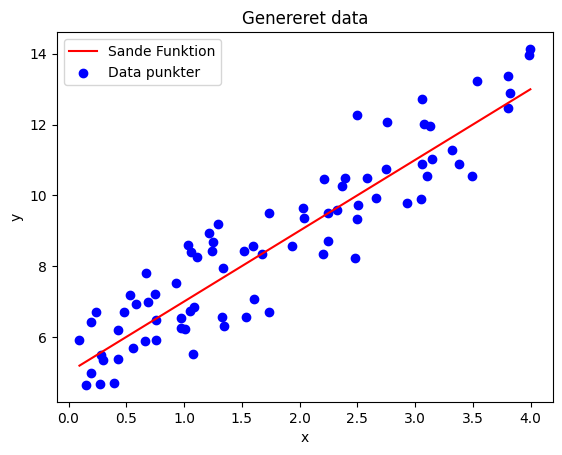

In [67]:
def plot_data(features, y, oracle=None):

    if orakel is not None:
        xs = np.linspace(np.min(features), np.max(features), num=features.shape[0])
        true_values = np.array(list(map(oracle, xs)))
        plt.plot(xs, true_values, label="Sande Funktion", color='red')


    plt.scatter(features, y, label='Data punkter', color='blue')
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Genereret data")
    plt.legend()
    plt.show()

plot_data(features=train_features, y=train_y, oracle=orakel)

De bedste vægte er [5.56437666 1.35444639 0.1403197 ]


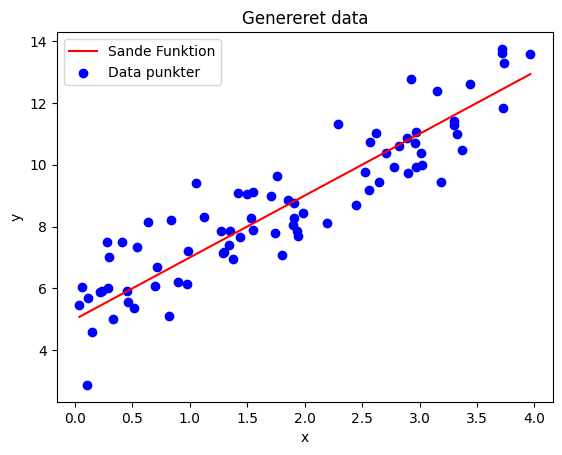

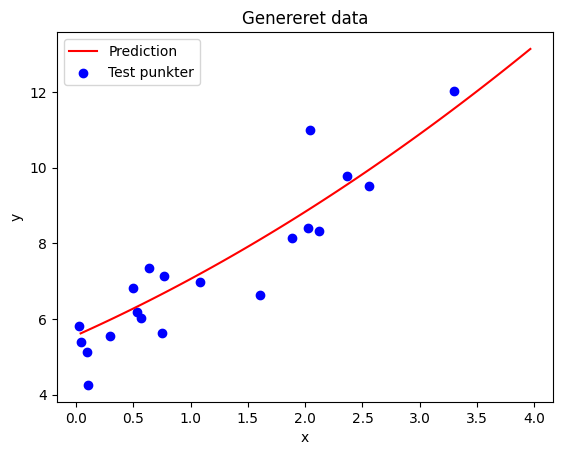

In [57]:
def linear_regression(features, y, intercept=True, higher_orders=[]):

    n_samples = features.shape[0]

    # Laver nyt navn for at vise vi har med vores data matrix at gøre
    X = features[:, None]

    # TODO: This implementation can technically eliminate need for intercept? Too complicated then?
    # Tilføj højere ordener (X^2, X^3, osv.) 
    for order in higher_orders:
        if isinstance(order, int) and order > 1:
            higher_vector = X ** order
            X = np.hstack((X, higher_vector))

    # Tilføj skæring med y-aksen - også kaldt 'bias'
    if intercept:
        one_vector = np.ones((n_samples, 1))
        X = np.hstack((one_vector, X))

    # Udregn lineær regressions bud på de bedste vægte
    best_weights = np.linalg.inv(X.T @ X) @ X.T @ y

    return best_weights, X  

# Få de bedste vægte til lineær regression...
best_weights, X = linear_regression(train_features, train_y, True, [2])

print(f"De bedste vægte er {best_weights}")

# Anvend de bedste vægte til at lave predictions...
plot_data(features=train_features, y=train_y, oracle=orakel)

# Lav nogle 'dummy features' til bare at vise prediction linjen som den ville være
dummy_features = np.linspace(np.min(train_features), np.max(train_features), train_features.shape[0])
_, dummy_X = linear_regression(dummy_features, train_y, True, [2])

# Lav predictions på disse 'dummy features'
predictions = dummy_X @ best_weights

plt.plot(dummy_features, predictions, label='Prediction', color='Red')
plt.scatter(test_features, test_y, label='Test punkter', color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Genereret data")
plt.legend()
plt.show()
